<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)
    

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'

In [4]:
df = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [7]:
df.iloc[:,2:12].corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.170581          0.506124        0.676764   
texture_mean                  -0.023389          0.236702        0.302418   
perimeter_mean                 0.207278          0.556936        0.716136   
area_mean                      0.177028          0.498502        0.685983   
smoothness_mean                1.000000          0.659123        0.521984   
compactness_mean               0.659123          1.000000        0.883121   
concavity_mean                 0.521984          0.883121        1.000000   
concave points_mean            0.553695          0.831135        0.921391   
symmetry_mean                  0.557775          0.602641        0.500667   
fractal_dimension_mean         0.584792          0.565369        0.336783   

                        concave points_mean  symmetry_mean  \
radius_mean                        0.822529       0.147741   
texture_mean                       0.293464       0.071401   
perimeter_mean                     0.850977       0.183027   
area_mean                          0.823269       0.151293   
smoothness_mean                    0.553695       0.557775   
compactness_mean                   0.831135       0.602641   
concavity_mean                     0.921391       0.500667   
concave points_mean                1.000000       0.462497   
symmetry_mean                      0.462497       1.000000   
fractal_dimension_mean             0.166917       0.479921   

                        fractal_dimension_mean  
radius_mean                          -0.311631  
texture_mean                         -0.076437  
perimeter_mean                       -0.261477  
area_mean                            -0.283110  
smoothness_mean                       0.584792  
compactness_mean                      0.565369  
concavity_mean                        0.336783  
concave points_mean                   0.166917  
symmetry_mean                         0.479921  
fractal_dimension_mean                1.000000

Some features are highly correlated. For instance, Radius_mean vs perimeter_mean vs concave points_mean vs area_mean.
compactness vs concave points vs concavity

In [8]:
#inspecting radius vs area in mean, standard error, and worst.
df.loc[:,["radius_mean","area_mean","radius_se","area_se","radius_worst","area_worst"]].corr()

radius_mean  area_mean  radius_se   area_se  radius_worst  \
radius_mean      1.000000   0.987357   0.679090  0.735864      0.969539   
area_mean        0.987357   1.000000   0.732562  0.800086      0.962746   
radius_se        0.679090   0.732562   1.000000  0.951830      0.715065   
area_se          0.735864   0.800086   0.951830  1.000000      0.757373   
radius_worst     0.969539   0.962746   0.715065  0.757373      1.000000   
area_worst       0.941082   0.959213   0.751548  0.811408      0.984015   

              area_worst  
radius_mean     0.941082  
area_mean       0.959213  
radius_se       0.751548  
area_se         0.811408  
radius_worst    0.984015  
area_worst      1.000000

These two features are highly correlated.

<AxesSubplot:xlabel='area_mean', ylabel='concavity_mean'>

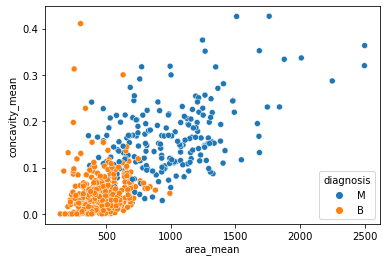

In [9]:
sns.scatterplot(x = df["area_mean"], y = df["concavity_mean"], hue = df["diagnosis"])

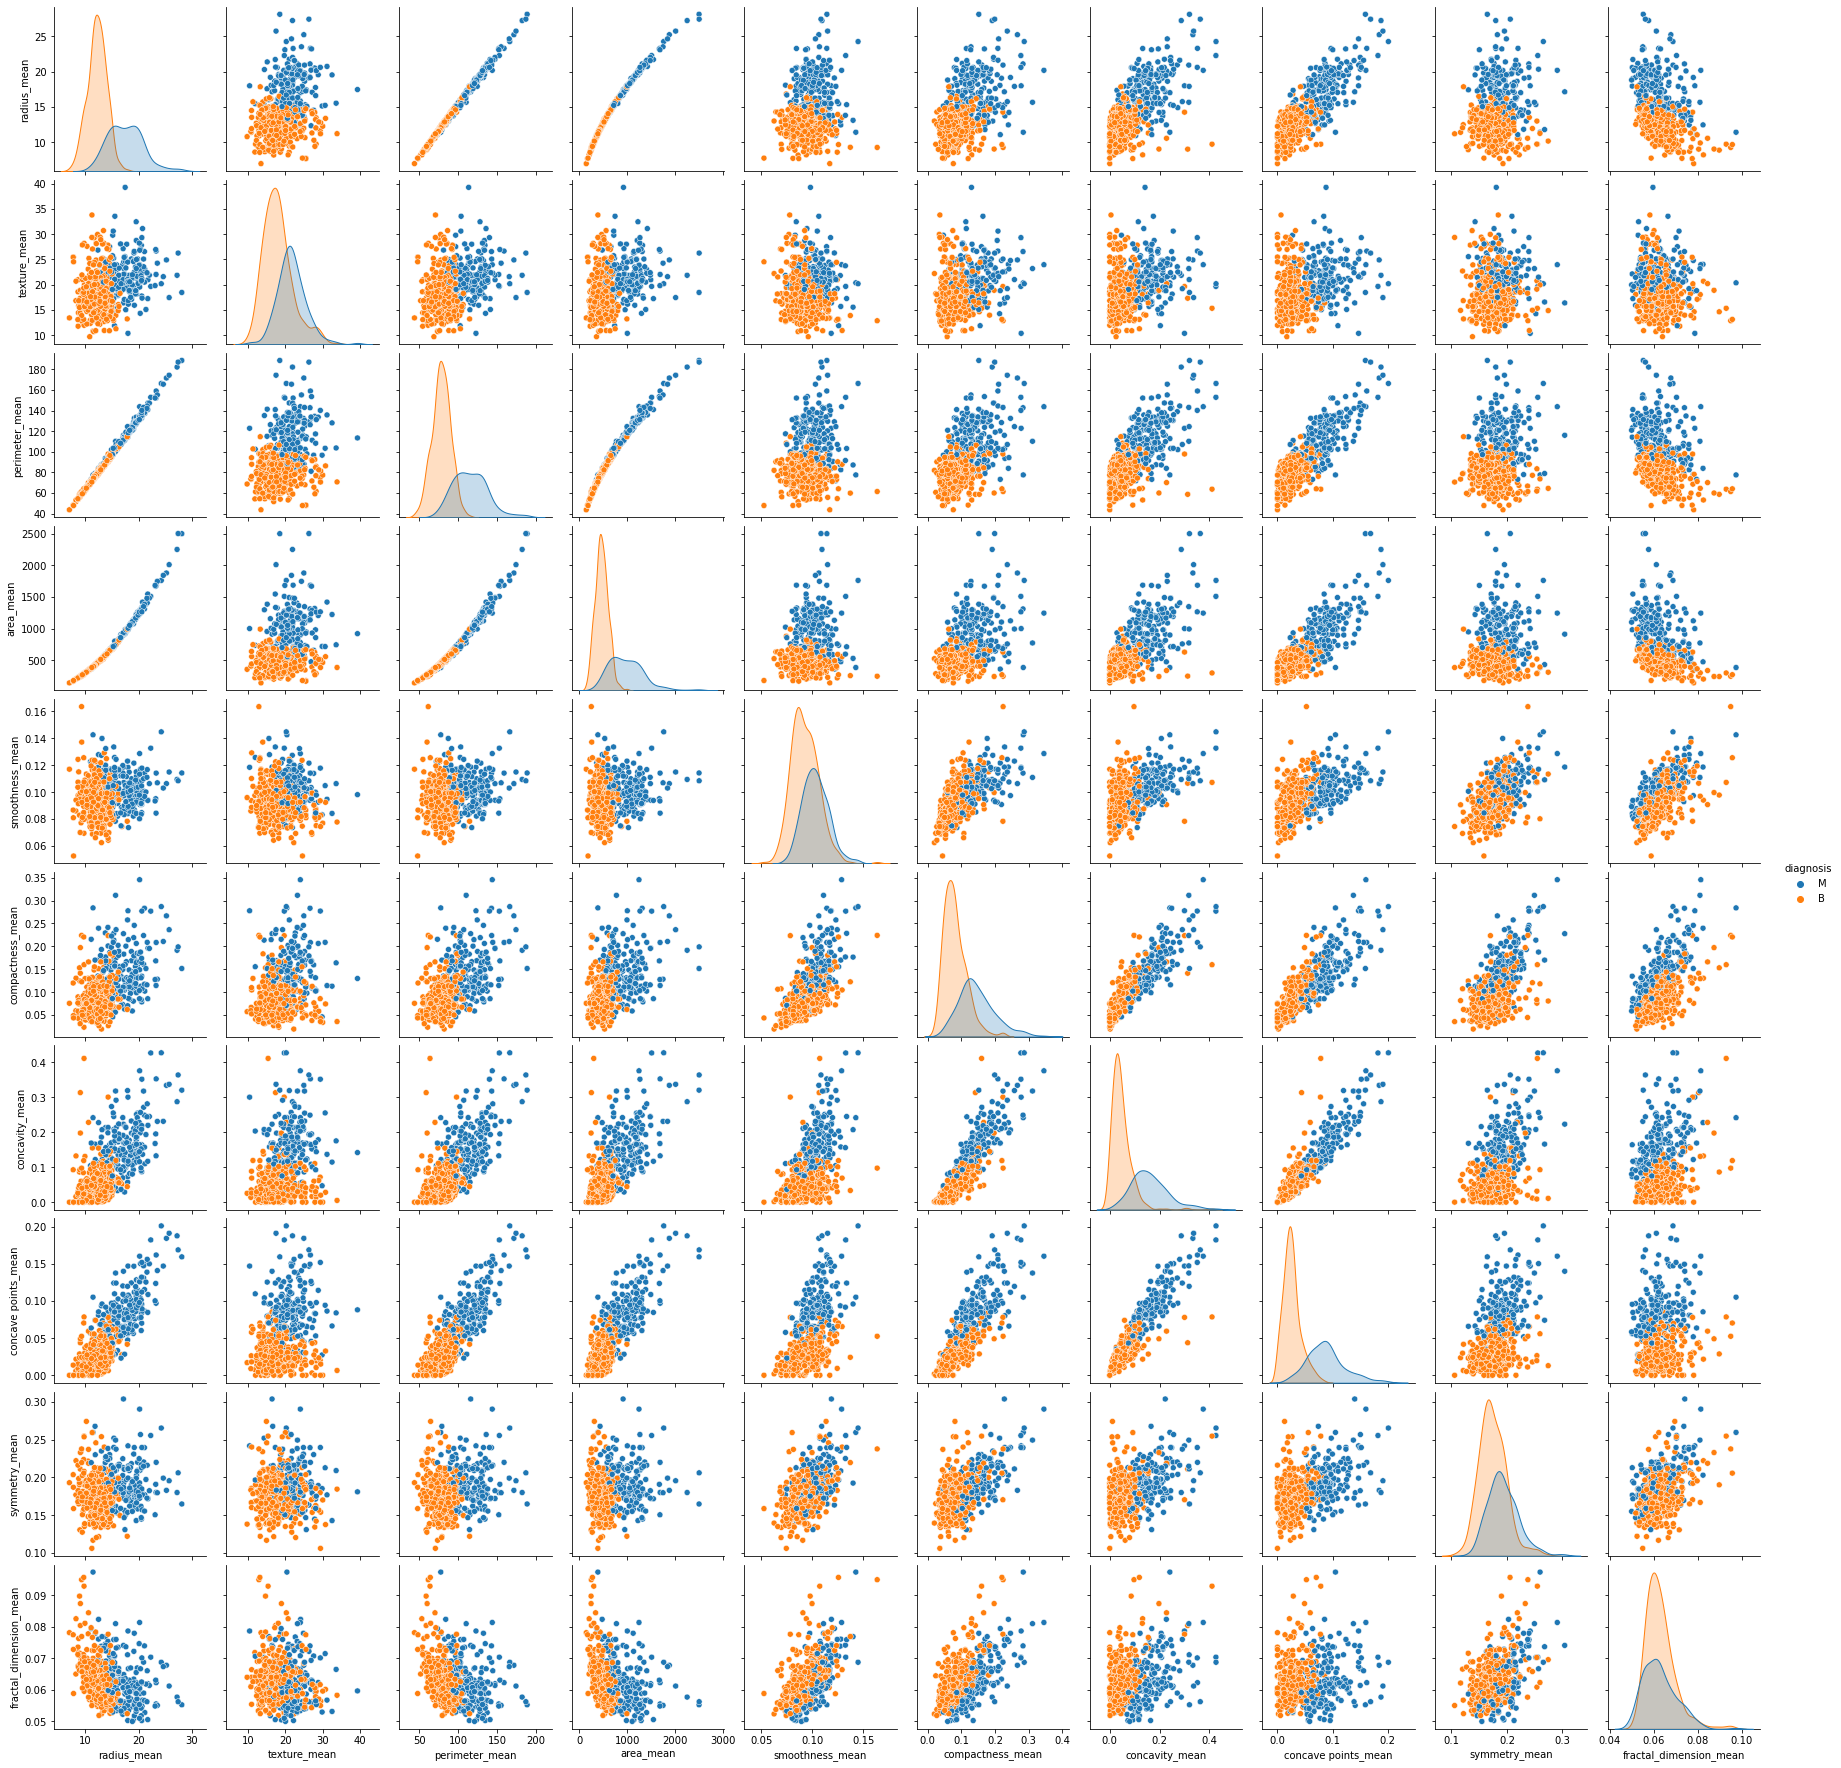

In [10]:
sns.pairplot(df.iloc[:,1:12], hue = "diagnosis")

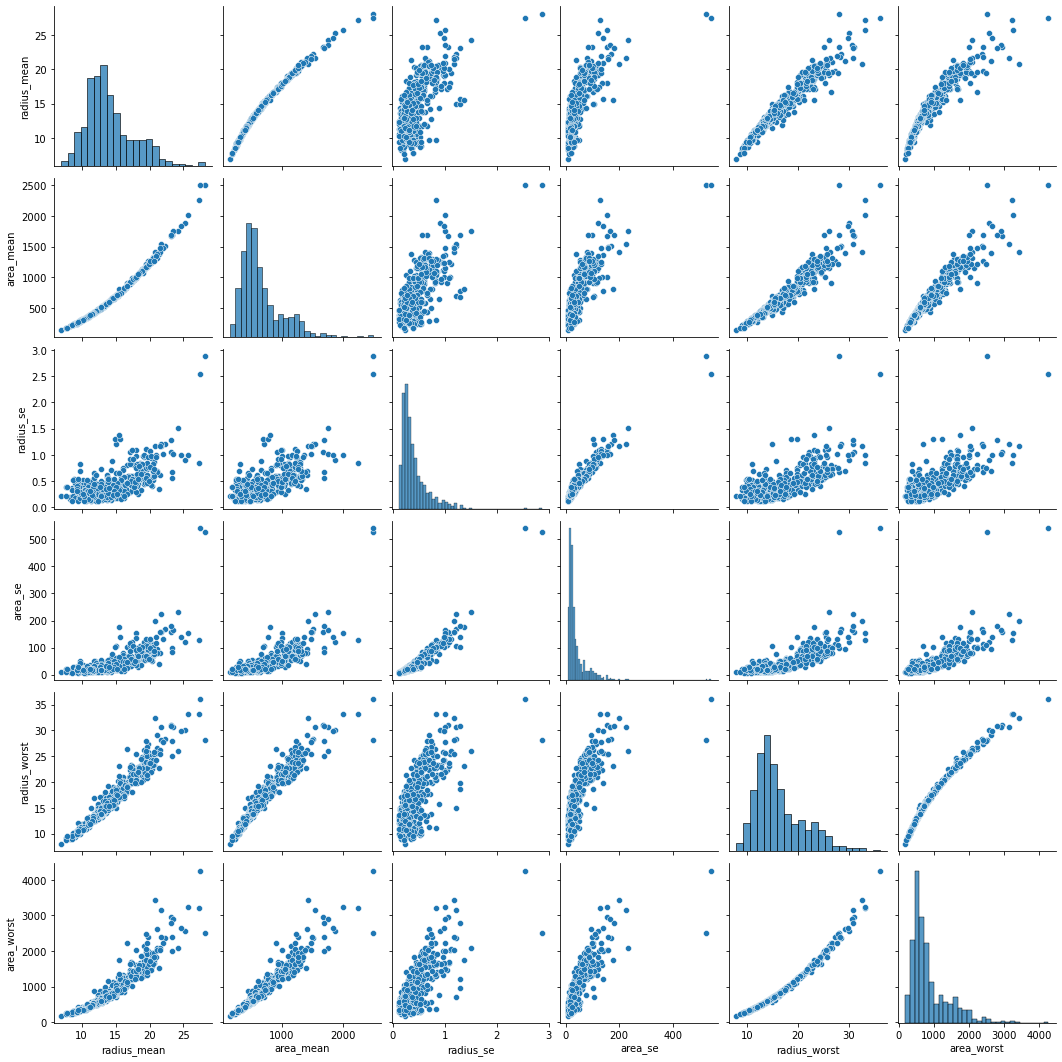

In [11]:
#inspecting radius 
sns.pairplot(df.loc[:,["radius_mean","area_mean","radius_se","area_se","radius_worst","area_worst"]])

radius, perimeter, area,compactness, concavity, concave points are the high contributed factors to breast cancer. The larger they are, the more likely that patent has cancers . On the other hand, texture, smoothness, symmetry, fracture has little effect on cancer. 

In [12]:
a = df.loc[:,["diagnosis", "radius_se","texture_se","perimeter_se","area_se","smoothness_se",
             "compactness_se","concavity_se","symmetry_se","fractal_dimension_se"]]

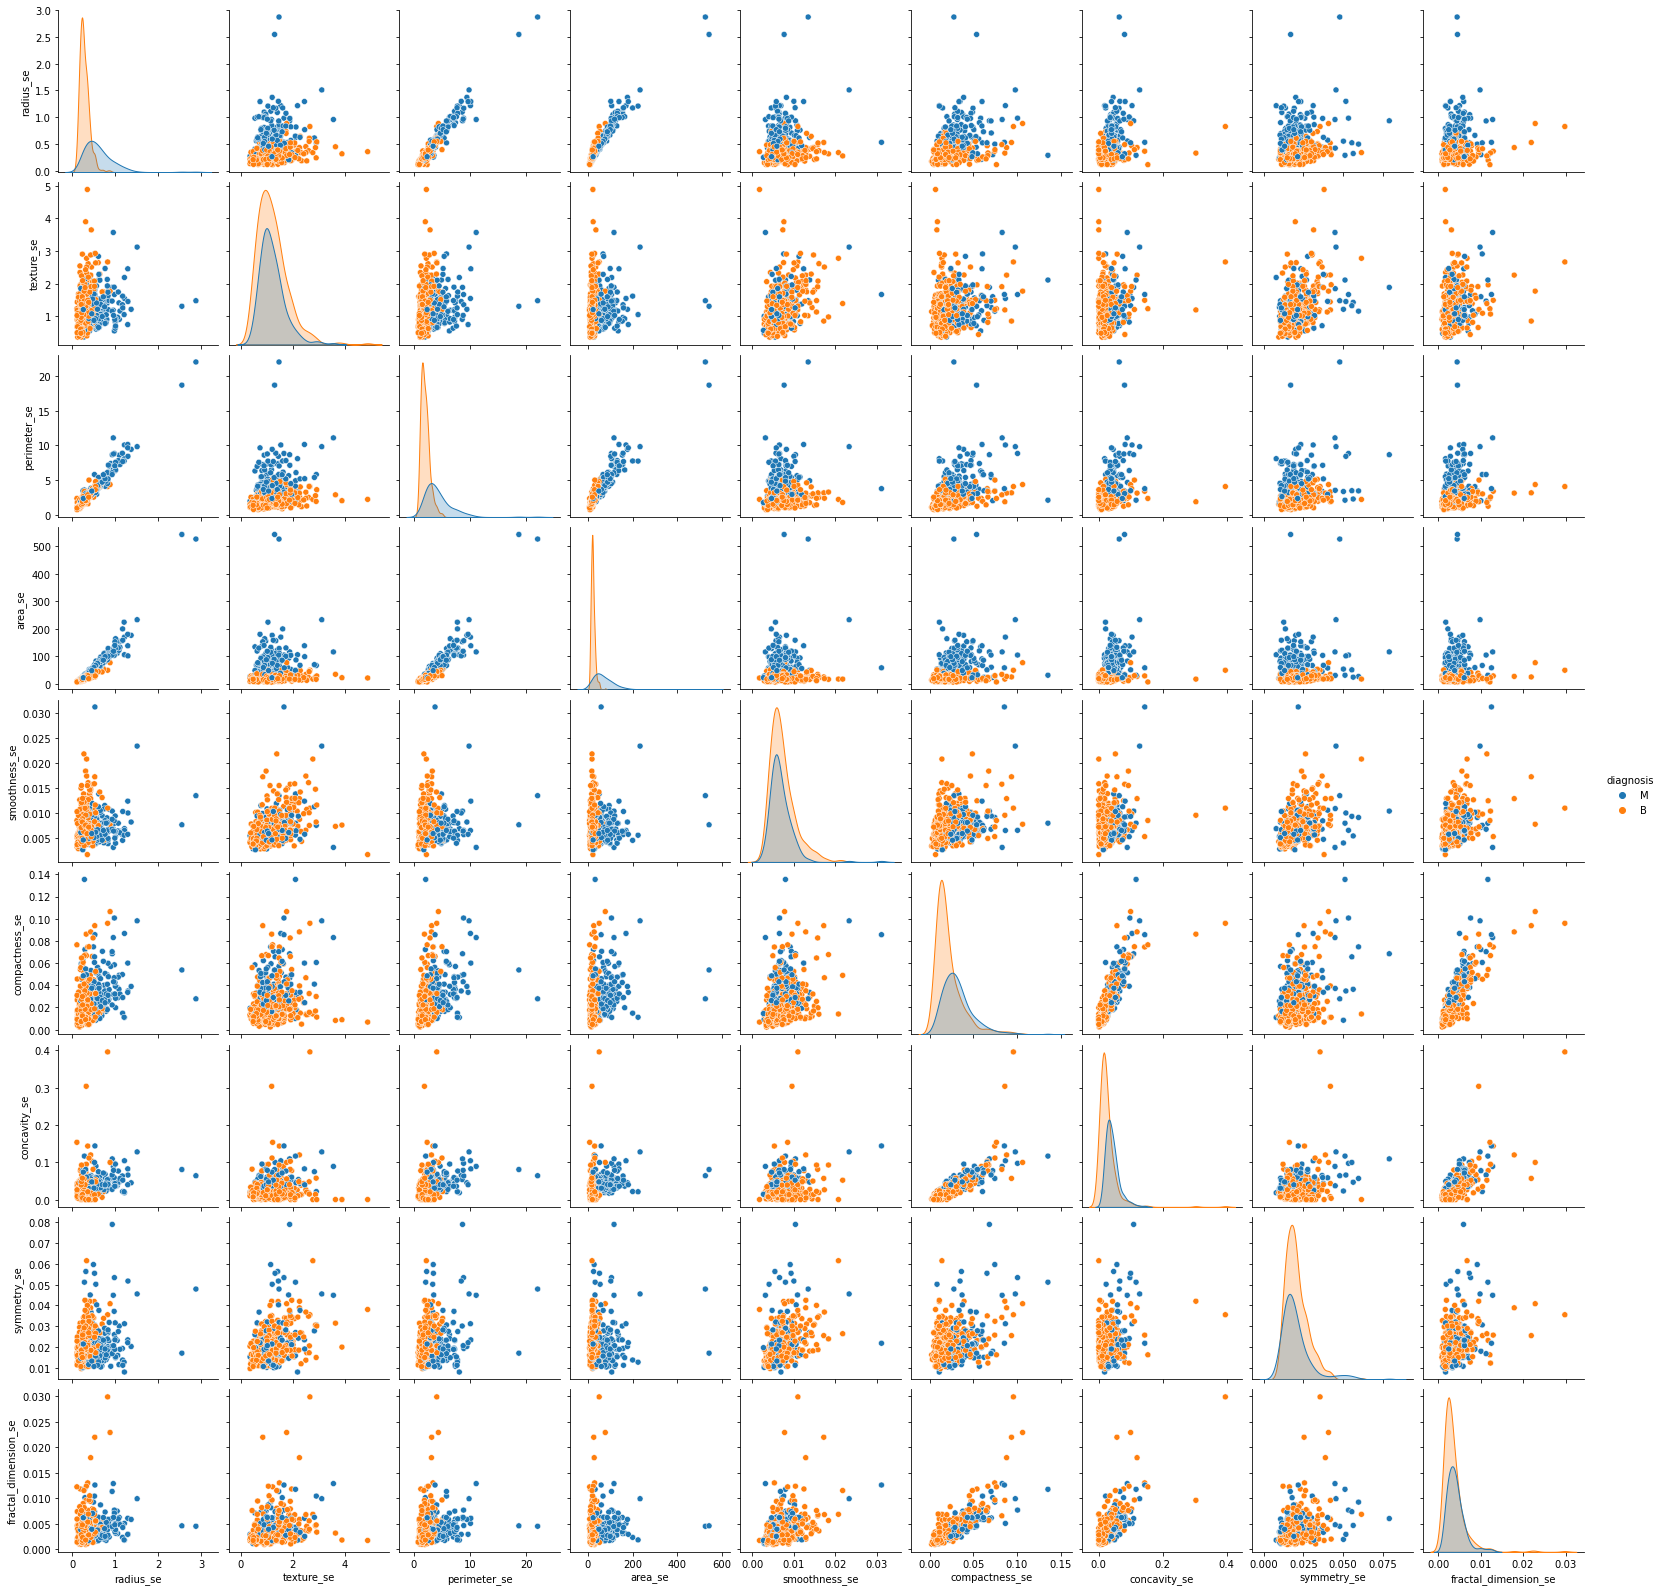

In [13]:
sns.pairplot(a, hue = "diagnosis")

In [14]:
df.diagnosis.replace(to_replace = ["M","B"],value = [1,0],inplace = True)

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = df.iloc[:,3:31]
y = df.diagnosis
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
# predict test class:
logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)
predict_y_test = model.predict(X_test)
# predicted test probability:
predict_y_test_prob = logreg.predict_proba(X_test)[:,1]

/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [16]:
# ANSWER
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test,predict_y_test)
cm_df = pd.DataFrame(cm,columns = ['predicted_healthy','predicted_cancer'])
cm_df["index"] = ["is_healthy","is_cancer"]
cm_df.set_index("index")

predicted_healthy  predicted_cancer
index                                          
is_healthy                 71                 1
is_cancer                   4                38

In [17]:
print(classification_report(y_test,predict_y_test))
ac = accuracy_score(y_test, predict_y_test)
print('Accuracy:', ac)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.


In [18]:
# ANSWER
# use float to perform true division, not integer division
(cm[1,1] + cm[0,0]) / float(cm[1,1] + cm[0,0] + cm[1,0]+cm[0,1])

0.956140350877193

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [19]:
# ANSWER
(cm[1,0] + cm[0,1]) / float(cm[1,1] + cm[0,0] + cm[1,0]+cm[0,1])

0.043859649122807015

#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [20]:
# ANSWER
cm[1,1] / float(cm[1,0]+cm[1,1])

0.9047619047619048

#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [21]:
# ANSWER
cm[0,0]/float(cm[0,0]+cm[0,1])

0.9861111111111112

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [22]:
# ANSWER
cm[0,1]/float(cm[0,1]+cm[0,1])

0.5

#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [23]:
# ANSWER
cm[1,1]/float(cm[1,1]+cm[0,1])

0.9743589743589743

#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [36]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
df_prob_test = pd.DataFrame(y_test.values.tolist(),columns = ["y_test"])
df_prob_test["class_0_pp"] = logreg.predict_proba(X_test)[:,0]
df_prob_test["class_1_pp"] = logreg.predict_proba(X_test)[:,1]
df_prob_test


y_test  class_0_pp  class_1_pp
0         0    0.744046    0.255954
1         1    0.341266    0.658734
2         0    0.995955    0.004045
3         1    0.002478    0.997522
4         1    0.281849    0.718151
..      ...         ...         ...
109       1    0.022399    0.977601
110       1    0.891383    0.108617
111       0    0.974179    0.025821
112       0    0.527627    0.472373
113       0    0.994188    0.005812

[114 rows x 3 columns]

#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [25]:
from sklearn.metrics import roc_curve, auc

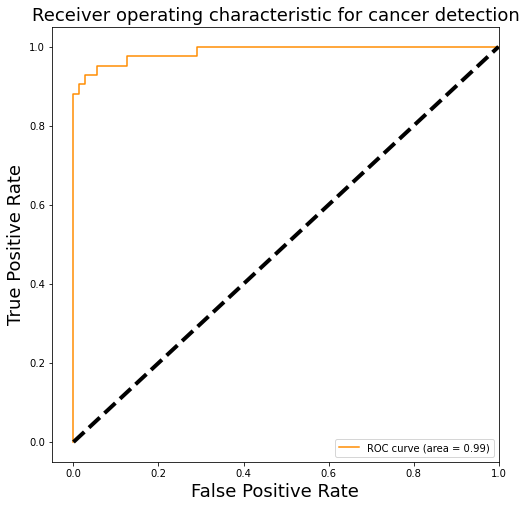

In [39]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr,_ = roc_curve(y_test,df_prob_test["class_1_pp"])
# Find auc
roc_auc= auc(fpr,tpr)
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



